In [1]:
import numpy as np
import tensorflow as tf
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
dim= 28
nclasses = 10
epochs = 13
batch_size = 100
((xtrain, ytrain),
 (xval, yval)) = tf.keras.datasets.mnist.load_data()
xtrain = xtrain/np.float32(255)
ytrain = ytrain.astype(np.int32)  # not required
xval = xval/np.float32(255)
yval = yval.astype(np.int32)  
print(xtrain.shape)
print(xval.shape)


11493376/11490434 [==============================] - 3s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [3]:
xtrain = xtrain.reshape(xtrain.shape[0], dim, dim, 1)
xval = xval.reshape(xval.shape[0], dim, dim, 1)
input_shape = (dim, dim, 1)


In [4]:
#convert class vectors to binary class matrices - this is for use in the categorical_crossentropy loss below
y_train = keras.utils.to_categorical(ytrain, nclasses)
y_val = keras.utils.to_categorical(yval, nclasses)
#print (y_train[10000])

Train on 60000 samples, validate on 10000 samples
Epoch 1/13
60000/60000 [==============================] - 48s 793us/step - loss: 0.8366 - acc: 0.7794 - val_loss: 0.2731 - val_acc: 0.9212
Epoch 2/13
60000/60000 [==============================] - 47s 778us/step - loss: 0.2326 - acc: 0.9314 - val_loss: 0.1768 - val_acc: 0.9454
Epoch 3/13
60000/60000 [==============================] - 48s 793us/step - loss: 0.1613 - acc: 0.9527 - val_loss: 0.1267 - val_acc: 0.9618
Epoch 4/13
60000/60000 [==============================] - 50s 831us/step - loss: 0.1245 - acc: 0.9638 - val_loss: 0.1006 - val_acc: 0.9683
Epoch 5/13
60000/60000 [==============================] - 48s 799us/step - loss: 0.1041 - acc: 0.9693 - val_loss: 0.0827 - val_acc: 0.9763
Epoch 6/13
60000/60000 [==============================] - 48s 803us/step - loss: 0.0898 - acc: 0.9734 - val_loss: 0.0729 - val_acc: 0.9783
Epoch 7/13
60000/60000 [==============================] - 49s 824us/step - loss: 0.0795 - acc: 0.9759 - val_loss: 0.

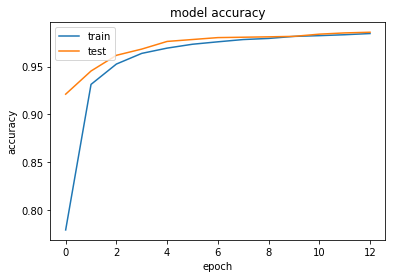

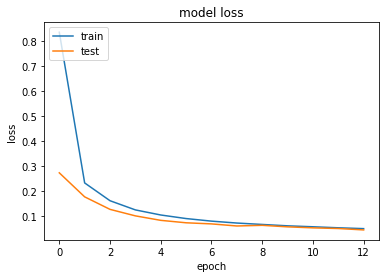

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(dim, dim, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])


history = model.fit(xtrain, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(xval, y_val))
score = model.evaluate(xval, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()
#plt.plot(range(1, 14), history.acc)
#plt.xlabel('Epochs')
#plt.ylabel('Accuracy')
plt.show()

In [17]:
model.count_params()

1087106